In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# DATA PREPROCESSING

### Training Image Preprocessing

In [19]:
import os
import shutil

# Directory containing images and annotation text file
directory = 'train'

# Read the annotation text file
with open(os.path.join(directory, '_annotations.txt'), 'r') as file:
    lines = file.readlines()

# Process each line in the annotation text file
for line in lines:
    parts = line.strip().split()
    image_name = parts[0]
    annotations = parts[1:]

    # Determine the class ID from the first annotation (assuming all annotations for an image have the same class ID)
    class_id = annotations[0].split(',')[-1]

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(directory, f'class_{class_id}')
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the image to the class directory
    image_path = os.path.join(directory, image_name)
    new_image_path = os.path.join(class_dir, image_name)
    shutil.move(image_path, new_image_path)

print('Images have been moved to separate folders based on annotations.')


Images have been moved to separate folders based on annotations.


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    './train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1236 files belonging to 3 classes.


### VALIDATION

In [27]:
import os
import shutil

# Directory containing images and annotation text file
directory = 'valid'

# Read the annotation text file
with open(os.path.join(directory, '_annotations.txt'), 'r') as file:
    lines = file.readlines()

# Process each line in the annotation text file
for line in lines:
    parts = line.strip().split()
    image_name = parts[0]
    annotations = parts[1:]

    # Determine the class ID from the first annotation (assuming all annotations for an image have the same class ID)
    class_id = annotations[0].split(',')[-1]

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(directory, f'class_{class_id}')
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the image to the class directory
    image_path = os.path.join(directory, image_name)
    new_image_path = os.path.join(class_dir, image_name)
    shutil.move(image_path, new_image_path)

print('Images have been moved to separate folders based on annotations.')

Images have been moved to separate folders based on annotations.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    './valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 200 files belonging to 3 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[209. 207. 218.]
   [219. 217. 228.]
   [132. 130. 141.]
   ...
   [154. 154. 152.]
   [147. 146. 152.]
   [ 54.  53.  49.]]

  [[103. 102. 110.]
   [141. 140. 148.]
   [136. 135. 143.]
   ...
   [ 75.  76.  70.]
   [144. 157. 137.]
   [172. 196. 170.]]

  [[ 94.  93.  99.]
   [133. 132. 138.]
   [133. 132. 138.]
   ...
   [157. 184. 153.]
   [172. 211. 158.]
   [195. 239. 204.]]

  ...

  [[122. 121. 116.]
   [ 74.  73.  69.]
   [226. 225. 223.]
   ...
   [180. 197. 155.]
   [223. 255. 201.]
   [224. 247. 201.]]

  [[ 14.  10.   9.]
   [ 19.  15.  16.]
   [169. 164. 170.]
   ...
   [214. 239. 197.]
   [204. 247. 201.]
   [207. 246. 202.]]

  [[  0.  10.   0.]
   [ 60.  73.  63.]
   [185. 198. 191.]
   ...
   [184. 195. 161.]
   [220. 253. 224.]
   [222. 253. 222.]]]


 [[[210. 211. 206.]
   [128. 129. 124.]
   [210. 211. 206.]
   ...
   [  1.   0.   2.]
   [  3.  34.   3.]
   [ 51. 115.  54.]]

  [[216. 217. 212.]
   [214. 215. 210.]
   [210. 211. 206.]
   ...
   [  7.  

# Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

In [8]:
## Bulding Cobvolution Model

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
from tensorflow.keras.regularizers import l2


model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))

In [17]:
model.add(Dropout(0.4))

In [18]:
#output layer
model.add(Dense(units=3,activation='softmax'))

In [19]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'
import tensorflow as tf

# Compilling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,237,539 (19.98 MB)

 Trainable params: 5,237,539 (19.98 MB)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING

In [22]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 42s 998ms/step - accuracy: 0.4032 - loss: 5.8742 - val_accuracy: 0.2750 - val_loss: 5.1589
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4235 - loss: 5.0421 - val_accuracy: 0.5100 - val_loss: 4.6415
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4803 - loss: 4.6121 - val_accuracy: 0.5450 - val_loss: 4.2576
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4454 - loss: 4.2250 - val_accuracy: 0.4100 - val_loss: 3.9762
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4833 - loss: 3.8939 - val_accuracy: 0.2900 - val_loss: 3.7695
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4777 - loss: 3.5970 - val_accuracy: 0.4350 - val_loss: 3.3542
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4877 - loss: 3.3305 - val_accuracy: 0.4200 - val_loss: 3.1969
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5172 - loss: 3.0764 - val_accuracy: 0.4400 - val_lo

## MODEL EVALUATION

In [23]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.5535 - loss: 2.5545
Training accuracy: 0.5542071461677551


In [24]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.3212 - loss: 2.6946
Validation accuracy: 0.35499998927116394


# SAVING MODEL

In [25]:
model.save('trained_plant_disease_model.keras')

In [26]:
training_history.history

{'accuracy': [0.3923948109149933,
  0.4279935359954834,
  0.45388349890708923,
  0.4563106894493103,
  0.48543688654899597,
  0.47653722763061523,
  0.491909384727478,
  0.5064724683761597,
  0.5105177760124207,
  0.5177993774414062],
 'loss': [5.550051689147949,
  4.94712495803833,
  4.528512477874756,
  4.154115200042725,
  3.8225958347320557,
  3.537806749343872,
  3.274664878845215,
  3.0392541885375977,
  2.8498735427856445,
  2.686023235321045],
 'val_accuracy': [0.2750000059604645,
  0.5099999904632568,
  0.5450000166893005,
  0.4099999964237213,
  0.28999999165534973,
  0.4350000023841858,
  0.41999998688697815,
  0.4399999976158142,
  0.30000001192092896,
  0.35499998927116394],
 'val_loss': [5.158854961395264,
  4.641493797302246,
  4.257646560668945,
  3.976235866546631,
  3.7694733142852783,
  3.354166269302368,
  3.1968741416931152,
  2.918027400970459,
  3.0200390815734863,
  2.671832323074341]}

In [27]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [29]:
training_history.history['accuracy']

[0.3923948109149933,
 0.4279935359954834,
 0.45388349890708923,
 0.4563106894493103,
 0.48543688654899597,
 0.47653722763061523,
 0.491909384727478,
 0.5064724683761597,
 0.5105177760124207,
 0.5177993774414062]

#  Accuracy Visualization

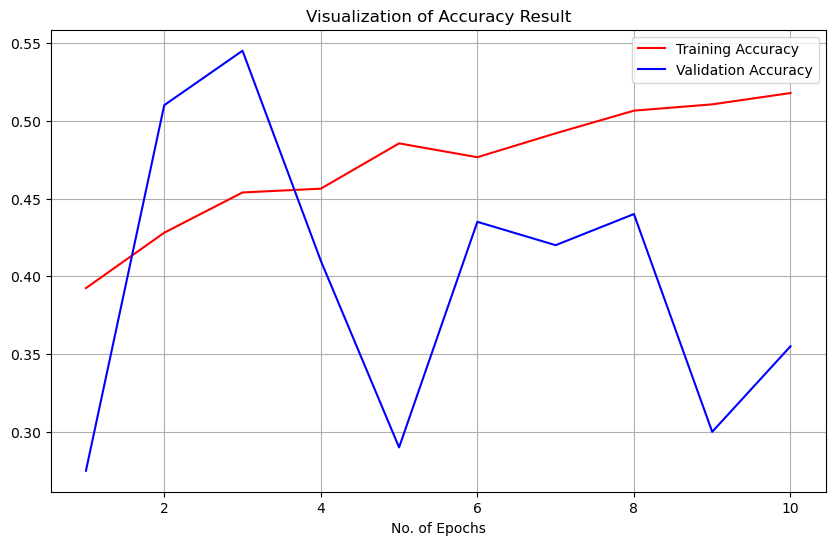

In [32]:
epochs = range(1, min(len(training_history.history['accuracy']) + 1,
                     len(training_history.history['val_accuracy']) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history.history['accuracy'][:len(epochs)], 
         color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'][:len(epochs)], 
         color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.grid(True)
plt.show()

## Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 200 files belonging to 3 classes.


In [35]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)>

In [38]:
predicted_categories

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1], dtype=int64)>

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     class_0       0.79      0.27      0.40       121
     class_1       0.27      0.42      0.33        26
     class_2       0.23      0.51      0.32        53

    accuracy                           0.35       200
   macro avg       0.43      0.40      0.35       200
weighted avg       0.57      0.35      0.37       200



# Confusion Matrix Visualization

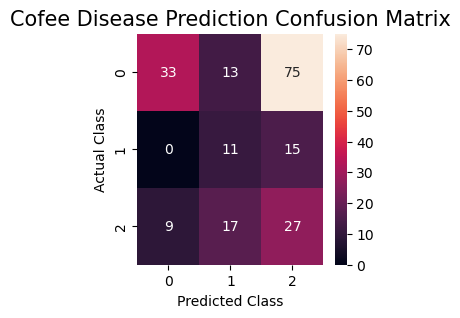

In [41]:
plt.figure(figsize=(3, 3))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Cofee Disease Prediction Confusion Matrix',fontsize = 15)
plt.show()

In [42]:
class_name

['class_0', 'class_1', 'class_2']